In [1]:
from google.colab import files
uploaded = files.upload()

Saving MSN.csv to MSN.csv


In [2]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

from keras.models import Sequential
from keras.layers import Dense, GRU

In [3]:
df = pd.read_csv('MSN.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,"89,000","89,000","89,200","88,200",683.44K,0.11%
1,3/4/2019,"89,500","89,100","91,400","89,000",1.28M,0.56%
2,3/5/2019,"89,400","89,500","90,900","89,300",772.09K,-0.11%
3,3/6/2019,"90,000","90,000","90,200","89,300",695.52K,0.67%
4,3/7/2019,"90,000","90,700","91,000","89,800",947.51K,0.00%
...,...,...,...,...,...,...,...
1310,5/29/2024,"75,000","75,700","76,900","75,000",8.00M,-0.66%
1311,5/30/2024,"77,200","74,300","77,400","74,100",11.16M,2.93%
1312,5/31/2024,"76,600","78,000","78,400","76,600",5.59M,-0.78%
1313,6/3/2024,"77,700","77,300","78,500","76,800",6.57M,1.44%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1315 non-null   object
 1   Price     1315 non-null   object
 2   Open      1315 non-null   object
 3   High      1315 non-null   object
 4   Low       1315 non-null   object
 5   Vol.      1315 non-null   object
 6   Change %  1315 non-null   object
dtypes: object(7)
memory usage: 72.0+ KB


<h1> Tien xu ly du lieu

In [5]:
df = df.dropna() # Drop missing values
df['Date'] = pd.to_datetime(df['Date'])
df["Price"] = df["Price"].str.replace(',', '').astype(float)

In [6]:
df1 = df.reset_index()['Price']

In [7]:
df['Index'] = np.arange(len(df.index))

<h1> Scale du lieu

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

<h1>Split the data into training, testing arcording to 7:3

In [9]:
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

In [10]:
train_data = df1[:train_size]
test_data = df1[train_size:]

<h1> Create dataset

In [11]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step = 1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   #i=0, X=0,1,2,3...99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [12]:
import numpy
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [13]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [14]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
#Fit the model
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 5s 44ms/step - loss: 0.1522
Epoch 2/100
13/13 [==============================] - 1s 44ms/step - loss: 0.0231
Epoch 3/100
13/13 [==============================] - 1s 43ms/step - loss: 0.0135
Epoch 4/100
13/13 [==============================] - 1s 45ms/step - loss: 0.0085
Epoch 5/100
13/13 [==============================] - 1s 43ms/step - loss: 0.0041
Epoch 6/100
13/13 [==============================] - 1s 44ms/step - loss: 0.0018
Epoch 7/100
13/13 [==============================] - 1s 44ms/step - loss: 0.0012
Epoch 8/100
13/13 [==============================] - 1s 42ms/step - loss: 0.0012
Epoch 9/100
13/13 [==============================] - 1s 45ms/step - loss: 0.0012
Epoch 10/100
13/13 [==============================] - 1s 65ms/step - loss: 0.0011
Epoch 11/100
13/13 [==============================] - 1s 86ms/step - loss: 0.0011
Epoch 12/100
13/13 [==============================] - 1s 80ms/step - loss: 0.0011
Epoch 13/100
13/13 [=====

<h1> Du bao du lieu test

In [16]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 11ms/step


In [17]:
#Chuan hoa du lieu cua y_pred
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)

In [18]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[78800.],
       [79200.],
       [77800.],
       [76800.],
       [78400.],
       [78400.],
       [77000.],
       [77600.],
       [77200.],
       [77900.],
       [79500.],
       [79200.],
       [78100.],
       [78100.],
       [78200.],
       [78700.],
       [78000.],
       [76400.],
       [73300.],
       [71300.],
       [71400.],
       [72300.],
       [73100.],
       [70600.],
       [73000.],
       [74100.],
       [73600.],
       [73600.],
       [73800.],
       [74400.],
       [74100.],
       [73300.],
       [73100.],
       [73200.],
       [72400.],
       [72000.],
       [70400.],
       [71800.],
       [72000.],
       [72000.],
       [71600.],
       [72800.],
       [72000.],
       [71800.],
       [72300.],
       [74100.],
       [73600.],
       [75500.],
       [74400.],
       [76500.],
       [78400.],
       [78800.],
       [78000.],
       [77100.],
       [76600.],
       [74500.],
       [75200.],
       [76100.],
       [76300.

<h1>
Evaluate the accuracy of the algorithm

In [19]:
#Tính RMSE, MAE, MAPE

test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(ytest, y_pred)
print('Testing MAE:', test_mae)

#MAPE
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Testing MAPE:', test_mape)

Testing RMSE: 1666.6471315014078
Testing MAE: 1245.9660794005104
Testing MAPE: 1.7385955249124803


<h1>Du doan co phieu trong 30 ngay tiep theo

In [20]:
x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.3698284]
101
1 day input [0.27278593 0.26007684 0.25518873 0.25616635 0.25518873 0.24247964
 0.25030062 0.26496495 0.25714397 0.2581216  0.27180831 0.27083069
 0.26887544 0.25616635 0.26203209 0.25225586 0.25030062 0.25518873
 0.23856915 0.24541251 0.24834537 0.24345726 0.24247964 0.24345726
 0.24345726 0.25616635 0.28256215 0.28158453 0.27376355 0.27474117
 0.26105446 0.26105446 0.26985306 0.27669642 0.29722649 0.29820411
 0.30113697 0.34904046 0.36077193 0.3988992  0.37641389 0.36663766
 0.37836913 0.39987682 0.38032438 0.37641389 0.37054815 0.36566004
 0.36468242 0.37152578 0.37641389 0.34708522 0.33242089 0.3461076
 0.35197333 0.33437613 0.32655515 0.337309   0.32655515 0.32655515
 0.31189082 0.31189082 0.32753277 0.31775655 0.3109132  0.31189082
 0.26300971 0.25518873 0.26203209 0.25909922 0.26300971 0.24150202
 0.26300971 0.27474117 0.26594257 0.27376355 0.29136075 0.30406984
 0.30504746 0.31580131 0.30700271 0.30113697 0.30113697 0.29918173
 0.31482369 0.31677893 0.34708522 0

In [21]:
print(scaler.inverse_transform(lst_output))

[[77826.37751406]
 [78068.57075018]
 [78300.6797145 ]
 [78527.72520378]
 [78751.60030532]
 [78973.69206375]
 [79194.77478531]
 [79415.31488281]
 [79635.58976519]
 [79855.79758167]
 [80076.01149505]
 [80296.33515263]
 [80516.80208734]
 [80737.44278368]
 [80958.28772616]
 [81179.34606013]
 [81400.62388247]
 [81622.11814475]
 [81843.84408921]
 [82065.7925705 ]
 [82287.94224948]
 [82510.31446528]
 [82732.88787878]
 [82955.6594415 ]
 [83178.62305656]
 [83401.76348171]
 [83625.05937779]
 [83848.52293861]
 [84072.13282502]
 [84295.85550407]
 [84519.71536335]
 [84743.67277303]
 [84967.73383   ]
 [85191.86804977]
 [85416.07848078]
 [85640.33463854]
 [85864.63652304]
 [86088.96584359]
 [86313.30430949]
 [86537.65496919]
 [86761.98733819]
 [86986.29531959]
 [87210.56062269]
 [87434.7771506 ]
 [87658.91441882]
 [87882.96937889]
 [88106.92374012]
 [88330.76530871]
 [88554.48189086]
 [88778.05519587]
 [89001.46693304]
 [89224.68966633]
 [89447.74168643]
 [89670.5833635 ]
 [89893.20860064]
 [90115.59

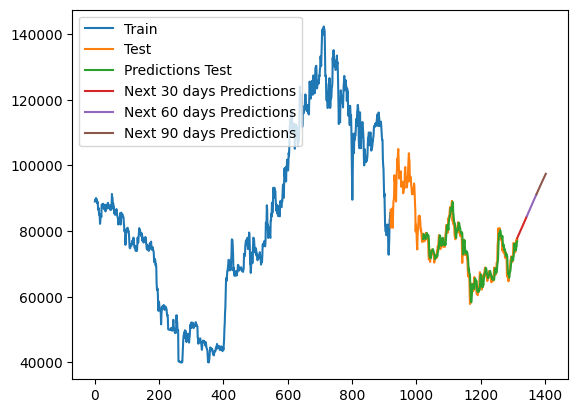

In [22]:
#Ve hinh
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()

<h1># Split the data into training, testing arcording to 8:2

In [23]:
train_size = int(0.8 * len(df1))
test_size = len(df1) - train_size

In [24]:
train_data = df1[:train_size]
test_data = df1[train_size:]

<h1>Create dataset

In [25]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step = 1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   #i=0, X=0,1,2,3...99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [26]:
import numpy
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [27]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [28]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
#Fit the model
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 5s 73ms/step - loss: 0.1288
Epoch 2/100
15/15 [==============================] - 1s 45ms/step - loss: 0.0203
Epoch 3/100
15/15 [==============================] - 1s 44ms/step - loss: 0.0104
Epoch 4/100
15/15 [==============================] - 1s 49ms/step - loss: 0.0061
Epoch 5/100
15/15 [==============================] - 1s 46ms/step - loss: 0.0027
Epoch 6/100
15/15 [==============================] - 1s 45ms/step - loss: 0.0013
Epoch 7/100
15/15 [==============================] - 1s 45ms/step - loss: 0.0011
Epoch 8/100
15/15 [==============================] - 1s 48ms/step - loss: 0.0011
Epoch 9/100
15/15 [==============================] - 1s 44ms/step - loss: 0.0010
Epoch 10/100
15/15 [==============================] - 1s 44ms/step - loss: 0.0010
Epoch 11/100
15/15 [==============================] - 1s 44ms/step - loss: 9.9959e-04
Epoch 12/100
15/15 [==============================] - 1s 45ms/step - loss: 9.6487e-04
Epoch 13/100
15/1

<h1> Du bao du lieu test

In [30]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)

6/6 [==============================] - 0s 12ms/step


In [31]:
#Chuan hoa du lieu cua y_pred
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)

In [32]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[72700.],
       [73500.],
       [73200.],
       [73800.],
       [73100.],
       [72700.],
       [71600.],
       [71000.],
       [68300.],
       [66400.],
       [69000.],
       [66000.],
       [66900.],
       [66000.],
       [61400.],
       [57800.],
       [58000.],
       [58200.],
       [59500.],
       [62700.],
       [63900.],
       [64000.],
       [62000.],
       [63800.],
       [62800.],
       [61700.],
       [62000.],
       [62600.],
       [65800.],
       [66000.],
       [64100.],
       [63600.],
       [64600.],
       [64900.],
       [63300.],
       [61800.],
       [60900.],
       [61300.],
       [62900.],
       [60500.],
       [61500.],
       [62200.],
       [61400.],
       [62100.],
       [63500.],
       [66200.],
       [67500.],
       [66200.],
       [65800.],
       [65000.],
       [63000.],
       [62900.],
       [62200.],
       [63900.],
       [63700.],
       [63000.],
       [66400.],
       [66200.],
       [67000.

<h1>Evaluate the accuracy of the algorithm

In [33]:
#Tính RMSE, MAE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(ytest, y_pred)
print('Testing MAE:', test_mae)

#MAPE
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Testing MAPE:', test_mape)

Testing RMSE: 1652.3332833253962
Testing MAE: 1248.0577980324078
Testing MAPE: 1.831596311980085


<h1>Du doan co phieu trong 30, 60, 90 ngay tiep theo





In [34]:
x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.36873564]
101
1 day input [0.27278593 0.26007684 0.25518873 0.25616635 0.25518873 0.24247964
 0.25030062 0.26496495 0.25714397 0.2581216  0.27180831 0.27083069
 0.26887544 0.25616635 0.26203209 0.25225586 0.25030062 0.25518873
 0.23856915 0.24541251 0.24834537 0.24345726 0.24247964 0.24345726
 0.24345726 0.25616635 0.28256215 0.28158453 0.27376355 0.27474117
 0.26105446 0.26105446 0.26985306 0.27669642 0.29722649 0.29820411
 0.30113697 0.34904046 0.36077193 0.3988992  0.37641389 0.36663766
 0.37836913 0.39987682 0.38032438 0.37641389 0.37054815 0.36566004
 0.36468242 0.37152578 0.37641389 0.34708522 0.33242089 0.3461076
 0.35197333 0.33437613 0.32655515 0.337309   0.32655515 0.32655515
 0.31189082 0.31189082 0.32753277 0.31775655 0.3109132  0.31189082
 0.26300971 0.25518873 0.26203209 0.25909922 0.26300971 0.24150202
 0.26300971 0.27474117 0.26594257 0.27376355 0.29136075 0.30406984
 0.30504746 0.31580131 0.30700271 0.30113697 0.30113697 0.29918173
 0.31482369 0.31677893 0.34708522 

In [35]:
print(scaler.inverse_transform(lst_output))

[[77714.60000691]
 [77851.81073037]
 [77979.04082933]
 [78103.83826539]
 [78227.48948434]
 [78350.73221102]
 [78473.91396871]
 [78597.20851904]
 [78720.7134124 ]
 [78844.4835209 ]
 [78968.55847436]
 [79092.9565635 ]
 [79217.68998212]
 [79342.7526333 ]
 [79468.14756551]
 [79593.8717303 ]
 [79719.93122455]
 [79846.30166069]
 [79972.98913559]
 [80099.95401943]
 [80227.22069979]
 [80354.75564373]
 [80482.56494814]
 [80610.62422544]
 [80738.95176631]
 [80867.50184402]
 [80996.29579771]
 [81125.31228822]
 [81254.55131558]
 [81384.00068596]
 [81513.63601178]
 [81643.48777753]
 [81773.51330492]
 [81903.72173929]
 [82034.10698375]
 [82164.6629414 ]
 [82295.39266068]
 [82426.2656571 ]
 [82557.30631825]
 [82688.4994019 ]
 [82819.82661733]
 [82951.29406145]
 [83082.88954046]
 [83214.62524816]
 [83346.4859423 ]
 [83478.46247754]
 [83610.55790231]
 [83742.76307127]
 [83875.06883907]
 [84007.48739952]
 [84139.99741346]
 [84272.59888089]
 [84405.28875336]
 [84538.07312778]
 [84670.92761654]
 [84803.86

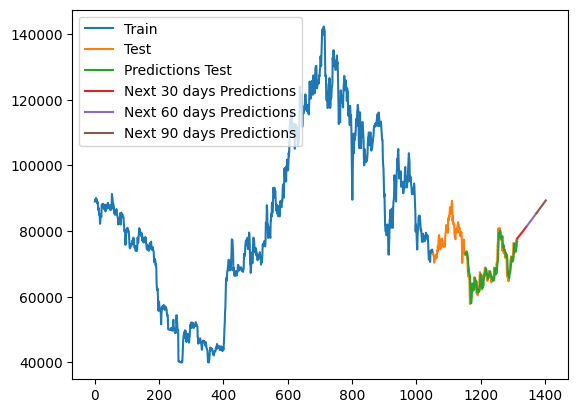

In [36]:
#Ve hinh
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()

<h1># Split the data into training, testing arcording to 9:1

In [37]:
train_size = int(0.9 * len(df1))
test_size = len(df1) - train_size

In [38]:
train_data = df1[:train_size]
test_data = df1[train_size:]

<h1> Create dataset

In [39]:
#Chuyển mảng giá trị của dataset thành ma trận
def create_dataset(dataset, time_step = 1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   #i=0, X=0,1,2,3...99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [40]:
import numpy
#Reshape into X=t,t+1, t+2... t+99 and Y= t+100
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [41]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [42]:
#Define GRU model
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [43]:
#Fit the model
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 [==============================] - 4s 65ms/step - loss: 0.0852
Epoch 2/100
17/17 [==============================] - 1s 72ms/step - loss: 0.0150
Epoch 3/100
17/17 [==============================] - 1s 77ms/step - loss: 0.0065
Epoch 4/100
17/17 [==============================] - 1s 63ms/step - loss: 0.0027
Epoch 5/100
17/17 [==============================] - 1s 45ms/step - loss: 0.0013
Epoch 6/100
17/17 [==============================] - 1s 45ms/step - loss: 0.0010
Epoch 7/100
17/17 [==============================] - 1s 43ms/step - loss: 0.0010
Epoch 8/100
17/17 [==============================] - 1s 43ms/step - loss: 9.6977e-04
Epoch 9/100
17/17 [==============================] - 1s 46ms/step - loss: 9.2777e-04
Epoch 10/100
17/17 [==============================] - 1s 44ms/step - loss: 9.0841e-04
Epoch 11/100
17/17 [==============================] - 1s 44ms/step - loss: 8.9161e-04
Epoch 12/100
17/17 [==============================] - 1s 46ms/step - loss: 8.6515e-04
Epoch

<h1>Du bao du lieu test

In [44]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 29ms/step


In [45]:
#Chuan hoa du lieu cua y_pred
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)

In [46]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))
ytest

array([[66100.],
       [66800.],
       [66500.],
       [66900.],
       [64700.],
       [66900.],
       [68100.],
       [67200.],
       [68000.],
       [69800.],
       [71100.],
       [71200.],
       [72300.],
       [71400.],
       [70800.],
       [70800.],
       [70600.],
       [72200.],
       [72400.],
       [75500.],
       [76400.],
       [75800.],
       [73900.],
       [75800.],
       [73500.],
       [73500.],
       [75500.],
       [75000.],
       [77200.],
       [76600.],
       [77700.]])

<h1>Evaluate the accuracy of the algorithm

In [47]:
#Tính RMSE, MAE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

#MAE
test_mae = mean_absolute_error(ytest, y_pred)
print('Testing MAE:', test_mae)

#MAPE
test_mape = np.mean(np.abs((ytest - y_pred) / ytest))*100
print('Testing MAPE:', test_mape)

Testing RMSE: 1617.8412696740413
Testing MAE: 1328.4875252016132
Testing MAPE: 1.8456522238346884


<h1>Du doan co phieu trong 30, 60, 90 ngay tiep theo

In [48]:
x_input=test_data[-time_step:].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.36183283]
101
1 day input [0.27278593 0.26007684 0.25518873 0.25616635 0.25518873 0.24247964
 0.25030062 0.26496495 0.25714397 0.2581216  0.27180831 0.27083069
 0.26887544 0.25616635 0.26203209 0.25225586 0.25030062 0.25518873
 0.23856915 0.24541251 0.24834537 0.24345726 0.24247964 0.24345726
 0.24345726 0.25616635 0.28256215 0.28158453 0.27376355 0.27474117
 0.26105446 0.26105446 0.26985306 0.27669642 0.29722649 0.29820411
 0.30113697 0.34904046 0.36077193 0.3988992  0.37641389 0.36663766
 0.37836913 0.39987682 0.38032438 0.37641389 0.37054815 0.36566004
 0.36468242 0.37152578 0.37641389 0.34708522 0.33242089 0.3461076
 0.35197333 0.33437613 0.32655515 0.337309   0.32655515 0.32655515
 0.31189082 0.31189082 0.32753277 0.31775655 0.3109132  0.31189082
 0.26300971 0.25518873 0.26203209 0.25909922 0.26300971 0.24150202
 0.26300971 0.27474117 0.26594257 0.27376355 0.29136075 0.30406984
 0.30504746 0.31580131 0.30700271 0.30113697 0.30113697 0.29918173
 0.31482369 0.31677893 0.34708522 

In [49]:
print(scaler.inverse_transform(lst_output))

[[77008.51807472]
 [76652.49877322]
 [76260.19682273]
 [75864.59035271]
 [75471.47446615]
 [75082.47398674]
 [74697.73828855]
 [74317.05398008]
 [73940.11011946]
 [73566.63844311]
 [73196.43165645]
 [72829.27331954]
 [72464.98967075]
 [72103.46182054]
 [71744.55868557]
 [71388.19490924]
 [71034.26989272]
 [70682.73486081]
 [70333.51969916]
 [69986.56953567]
 [69641.83864361]
 [69299.29044157]
 [68958.88225126]
 [68620.58358818]
 [68284.37006474]
 [67950.19595417]
 [67618.05211115]
 [67287.90805116]
 [66959.74548352]
 [66633.53697217]
 [66309.26117796]
 [65986.90285864]
 [65666.43762663]
 [65347.85633656]
 [65031.12697972]
 [64716.23888654]
 [64403.18291165]
 [64091.93009479]
 [63782.47129062]
 [63474.79430532]
 [63168.87932399]
 [62864.71110436]
 [62562.27592842]
 [62261.56769927]
 [61962.5559324 ]
 [61665.2452005 ]
 [61369.61721286]
 [61075.65520301]
 [60783.35307406]
 [60492.6986322 ]
 [60203.67511095]
 [59916.27031653]
 [59630.47815202]
 [59346.28947209]
 [59063.68903448]
 [58782.66

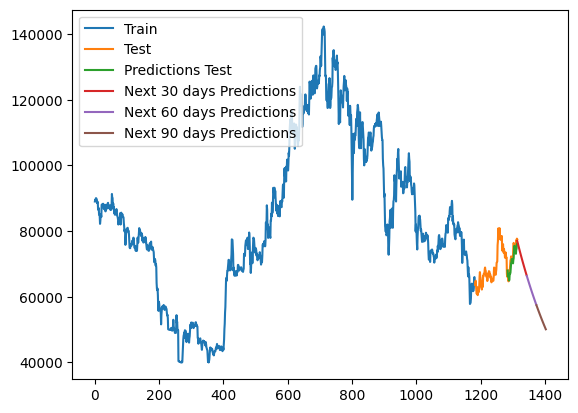

In [50]:
#Ve hinh
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=len(df1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size + time_step + 1 , stop=len(df1), step=1)
plt.plot(test_data_index, y_pred)

next_30_days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 29, step=1)
plt.plot(next_30_days_index, scaler.inverse_transform(lst_output[:30]))

next_60_days_index = pd.RangeIndex(start=len(df1) + 29, stop=len(df1) + 59, step=1)
plt.plot(next_60_days_index, scaler.inverse_transform(lst_output[30:60]))

next_90_days_index = pd.RangeIndex(start=len(df1) + 59, stop=len(df1) + 89, step=1)
plt.plot(next_90_days_index, scaler.inverse_transform(lst_output[60:]))

plt.legend(['Train', 'Test', 'Predictions Test', 'Next 30 days Predictions', 'Next 60 days Predictions', 'Next 90 days Predictions'])
plt.show()